In [392]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

COLLECTING OR GATHERNING THE DATA

In [393]:
df=pd.read_csv('/content/MagicBricks.csv')

In [394]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


CLEANING THE DATA

In [395]:
df['Furnishing']=df['Furnishing'].apply({'Furnished':1,'Semi-Furnished':2,'Unfurnished':3}.get)
df['Status']=df['Status'].apply({'Ready_to_move':1,'Almost_ready':2}.get)
df['Transaction']=df['Transaction'].apply({'New_Property':1,'Resale':2}.get)
df['Type']=df['Type'].apply({'Builder_Floor':1,'Apartment':2}.get)


In [396]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,2.0,Rohini Sector 25,1.0,6500000,1,1,1.0,NaN
1,750.0,2,2.0,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,1,1,2.0,6667.0
2,950.0,2,2.0,1.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,1,2,2.0,6667.0
3,600.0,2,2.0,2.0,Rohini Sector 24,1.0,4200000,1,2,1.0,6667.0
4,650.0,2,2.0,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,1,1,1.0,6667.0


CHECKING NULL VALUES IN OUR DATASET

In [397]:
df.describe()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1254.000000,1226.000000,1.259000e+03,1259.000000,1259.000000,1254.000000,1018.000000
mean,1466.452724,2.796664,2.556086,2.143541,1.935563,2.130670e+07,1.059571,1.620334,1.472887,15690.136542
std,1568.055040,0.954425,1.042220,0.644309,6.279212,2.560115e+07,0.236785,0.485497,0.499464,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+06,1.000000,1.000000,1.000000,1259.000000
25%,800.000000,2.000000,2.000000,2.000000,1.000000,5.700000e+06,1.000000,1.000000,1.000000,6364.000000
50%,1200.000000,3.000000,2.000000,2.000000,1.000000,1.420000e+07,1.000000,2.000000,1.000000,11291.500000
75%,1700.000000,3.000000,3.000000,3.000000,2.000000,2.550000e+07,1.000000,2.000000,2.000000,18000.000000
max,24300.000000,10.000000,7.000000,3.000000,114.000000,2.400000e+08,2.000000,2.000000,2.000000,183333.000000


In [398]:
df['BHK'].value_counts()

BHK
3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: count, dtype: int64

In [399]:
df[df['BHK']==6]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
163,4050.0,6,3.0,1.0,Budh Vihar Phase 1,1.0,5100000,1,2,1.0,1259.0
164,2400.0,6,4.0,1.0,Budh Vihar Phase 2,1.0,6000000,1,2,1.0,2500.0
261,2800.0,6,4.0,2.0,"Taimoor Enclave, New Friends Colony carpet are...",2.0,29500000,1,2,2.0,15459.0
352,324.0,6,3.0,1.0,"Yamuna Vihar, Shahdara",1.0,8700000,1,2,1.0,35714.0
353,720.0,6,5.0,1.0,"Yamuna Vihar, Shahdara",1.0,22000000,1,2,1.0,35714.0
585,5500.0,6,7.0,1.0,Safdarjung Enclave,1.0,160000000,1,2,2.0,14818.0


In [400]:
df[df['BHK']==7]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
345,2970.0,7,4.0,1.0,"Yamuna Vihar, Shahdara",1.0,26500000,1,2,1.0,8923.0


In [401]:
df[df['BHK']==10]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
721,1200.0,10,4.0,2.0,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",2.0,17000000,1,2,2.0,NaN


In [402]:
df=df.drop([163,164,261,352,353,585,345,721])

In [403]:
df['BHK'].value_counts()

BHK
3    541
2    367
4    220
1     96
5     27
Name: count, dtype: int64

In [404]:
df['Bathroom'].value_counts()

Bathroom
2.0    551
3.0    353
1.0    146
4.0    134
5.0     56
6.0      7
7.0      2
Name: count, dtype: int64

In [405]:
df[df['Bathroom']==6]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
225,5025.0,5,6.0,3.0,Greater Kailash 2,4.0,170000000,2,1,1.0,22222.0
495,5025.0,5,6.0,3.0,Greater Kailash 2,4.0,170000000,2,1,1.0,22222.0
527,810.0,5,6.0,1.0,Geeta Colony,1.0,28900000,1,2,2.0,6667.0
659,3050.0,5,6.0,2.0,Commonwealth Games Village 2010,NaN,62500000,1,2,2.0,20492.0
676,3112.0,5,6.0,2.0,Commonwealth Games Village 2010,3.0,60000000,1,2,2.0,19280.0
681,2300.0,5,6.0,2.0,"Common Wealth Games Village, Commonwealth Game...",3.0,58000000,1,2,2.0,21311.0
1211,4350.0,4,6.0,2.0,"Orchid Metropolis, Hauz Khas",2.0,135000000,1,1,2.0,170000.0


In [406]:
df=df.drop([225,495,527,659,676,681,1211])

<Axes: xlabel='Bathroom'>

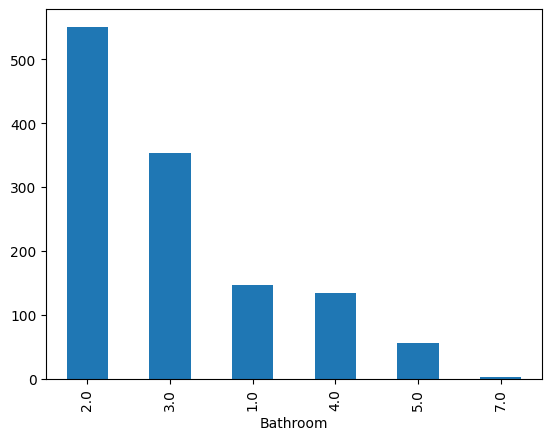

In [407]:
df.Bathroom.value_counts().plot.bar()

In [408]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         32
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       240
dtype: int64

In [409]:
df.Parking.fillna(0,inplace=True)

In [410]:
df['Parking'].value_counts()

Parking
1.0      789
2.0      338
3.0       52
0.0       32
4.0       14
5.0        7
39.0       7
114.0      3
9.0        1
10.0       1
Name: count, dtype: int64

In [411]:
df[df.Parking==39]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
875,365.0,1,1.0,3.0,Narela,39.0,3500000,1,2,2.0,7143.0
876,390.0,1,1.0,3.0,"DDA Lig Flats, Narela",39.0,2000000,1,2,2.0,5128.0
877,350.0,1,1.0,3.0,"DDA Flats Pocket 3, Narela",39.0,3000000,1,2,2.0,5128.0
878,210.0,1,1.0,2.0,"DDA Lig Flats, Narela",39.0,2000000,1,1,2.0,5128.0
879,50.0,1,1.0,3.0,"DDA Lig Flats, Narela",39.0,3500000,1,1,2.0,5128.0
880,500.0,1,1.0,3.0,"DDA Pocket H, Narela",39.0,1800000,1,2,2.0,3600.0
881,350.0,1,1.0,3.0,"DDA Lig Flats, Narela",39.0,1600000,1,2,2.0,4571.0


In [412]:
df['Parking'].replace([39,114],1,inplace=True)
df['Parking'].replace([5,9,10],4,inplace=True)

In [413]:
df['Status'].value_counts()

Status
1    1171
2      73
Name: count, dtype: int64

In [414]:
df['Type'].value_counts()

Type
1.0    654
2.0    585
Name: count, dtype: int64

In [415]:
df['Transaction'].value_counts()

Transaction
2    769
1    475
Name: count, dtype: int64

<Axes: xlabel='Area', ylabel='Price'>

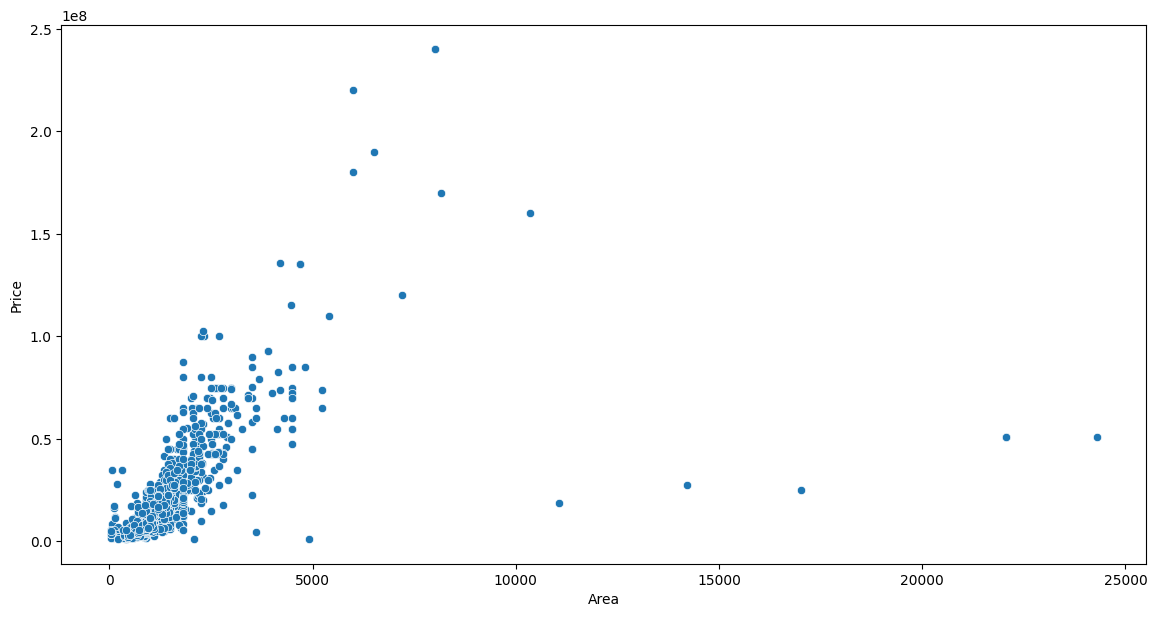

In [416]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df.Area,y=df.Price)


<Axes: xlabel='Per_Sqft', ylabel='Price'>

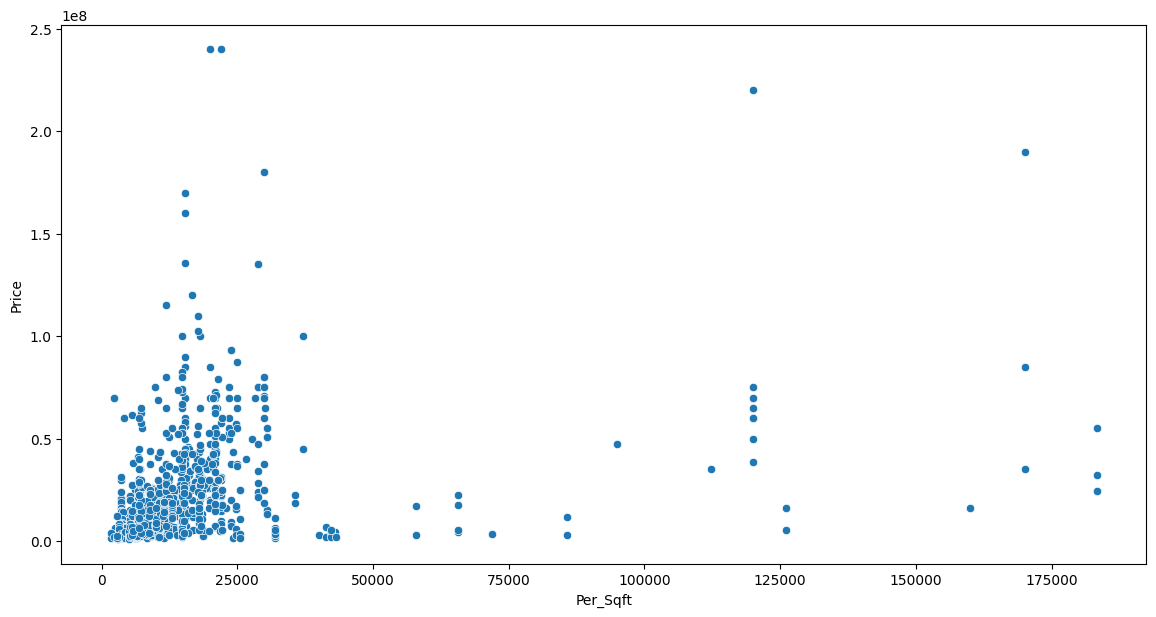

In [417]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df.Per_Sqft,y=df.Price)


In [418]:
df.drop(['Per_Sqft'],axis=1,inplace=True)

In [419]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       2
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
dtype: int64

In [420]:
df.Bathroom.fillna(df.Bathroom.median(),inplace=True)
df.Type.fillna('Apartment',inplace=True)
df.Furnishing.fillna('Semi-Furnished',inplace=True)

In [421]:
df.Locality.unique()

array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20',
       'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can lega

In [422]:
df.drop('Locality',axis=1,inplace=True)

In [423]:
df=pd.get_dummies(df)

In [424]:
x=df.drop('Price',axis=1)
y=df['Price']

In [425]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1)

In [426]:
mlm=LinearRegression()

In [427]:
mlm.fit(x_train,y_train)

LinearRegression()

In [428]:
predictions=mlm.predict(x_test)

In [429]:
print(predictions)

[ 1.14045597e+07  5.74113954e+07  1.07316358e+07  2.74405257e+07
  4.53073014e+07  2.47894252e+07  1.35703085e+07 -5.94584531e+06
  1.16554685e+07  2.89407626e+07  4.01530038e+07  1.48000341e+07
  5.31923474e+07 -1.50942360e+06  3.67061266e+07  4.60254933e+07
  8.04254588e+06  8.83553109e+06  1.32972677e+07  2.70104661e+07
  2.35834470e+07  8.42789856e+06  6.49808353e+07  4.38187947e+07
  7.85201321e+06  3.10601292e+07  8.00133860e+07  1.13448746e+07
  4.56362477e+07  1.85181344e+07  2.99095178e+07  2.31932908e+07
  1.65574190e+07  5.65000350e+07  7.97770879e+06  1.27302163e+07
  5.96539669e+07  2.73681670e+07  6.38492675e+07  4.60779960e+07
  1.29041618e+07 -6.32428089e+06  9.60939809e+06  4.10640231e+07
  2.54198665e+07  1.44013834e+07  6.40550271e+05  8.28374153e+06
  2.70763084e+07  3.63816639e+07  1.86881061e+06  1.06572254e+07
  7.56813240e+07 -1.55251079e+06 -5.69773258e+06  1.49154800e+07
  6.93546975e+06  4.94806528e+07 -8.02237280e+06  1.00622855e+07
  2.87323496e+07  1.26337

In [430]:
score=r2_score(y_test,predictions)

In [431]:
print(score)

0.5111296514912917


In [432]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor(n_estimators=100)
rd.fit(x_train,y_train)

RandomForestRegressor()

In [433]:
rd_pred=rd.predict(x_test)

In [434]:
rd_score=r2_score(rd_pred,y_test)
print(rd_score)

0.6422173936278366


In [435]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse=sqrt(mean_squared_error(y_test,predictions))
print(mse)

17845742.08033998


<Axes: xlabel='Area', ylabel='Price'>

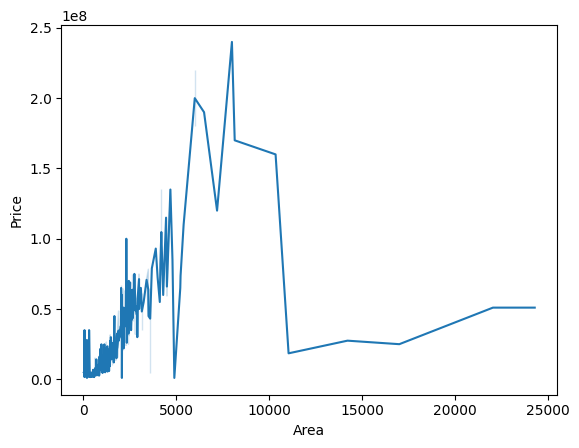

In [436]:
sns.lineplot(x=df.Area,y=df.Price)

<Axes: xlabel='Area', ylabel='Price'>

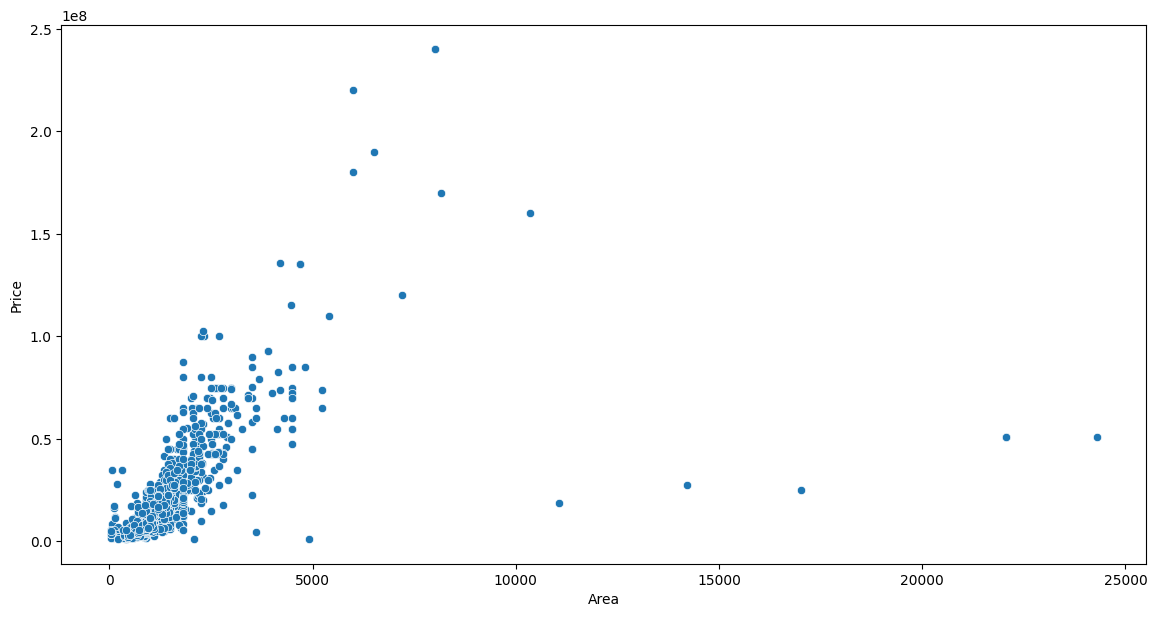

In [437]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df.Area,y=df.Price)

In [438]:
p = np.array(df[df.Area>5000].index)

In [439]:
df.drop(p,inplace=True)

<Axes: xlabel='Area', ylabel='Price'>

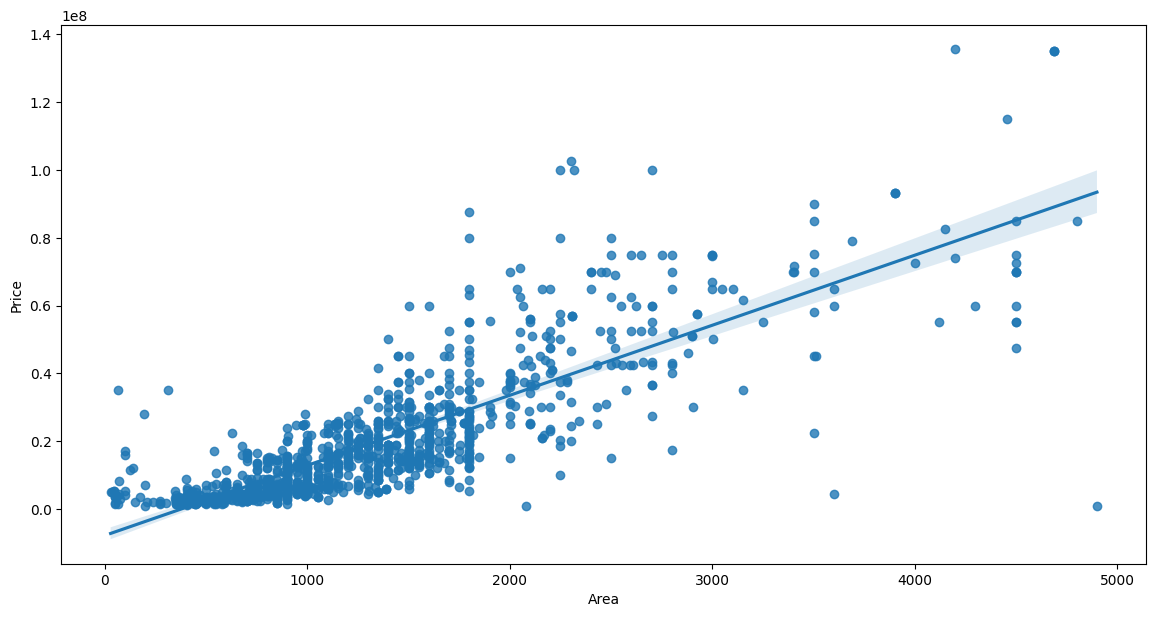

In [440]:
plt.figure(figsize=(14,7))
sns.regplot(x=df.Area,y=df.Price)